Welcome,

In This we are using U.S house price prediction dataset to predict the price of houses based on various attributes.

We will analyze the data, clean it, use to visualize and find the corelation with other varribales.

Let's get started by importing nessecary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Archive/kc_house_data.csv')

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00


With the help of ADAboost, GradientBoosting, XGBoost, lightBGM, and CATboost we try to predict the prices.

Importing Dataset

using head functions to have a glimpse at the data and its constituents.


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Using info method to get a more about the data types and null count.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df['condition']

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 21597, dtype: int64

Counting null values in the dataset using isnull

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Using nunique we get to know the no. of unique values in every columns.

In [ ]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Using Describe to know more about the numerical columns in the dataset.

*   List item
*   List item





In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Veiwing the names of the columns using columns method.

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Using shape to know about the dimension of the dataset (Rows, Columns)

In [ ]:
df.shape

(21597, 21)

Using set Style to set the background style to 'WhiteGrid'.

In [ ]:
sns.set_style('whitegrid')

Using Corr we are ploting a graph to view the corelation between all the numerical columns.

<Axes: >

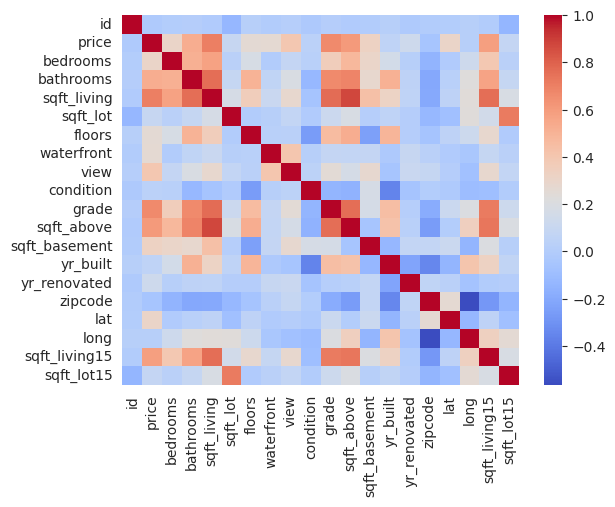

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm')

Using Corrwith we can see the correlation with other numerical coumns to a single columns, here we are using price to perform corrwith.

<Axes: >

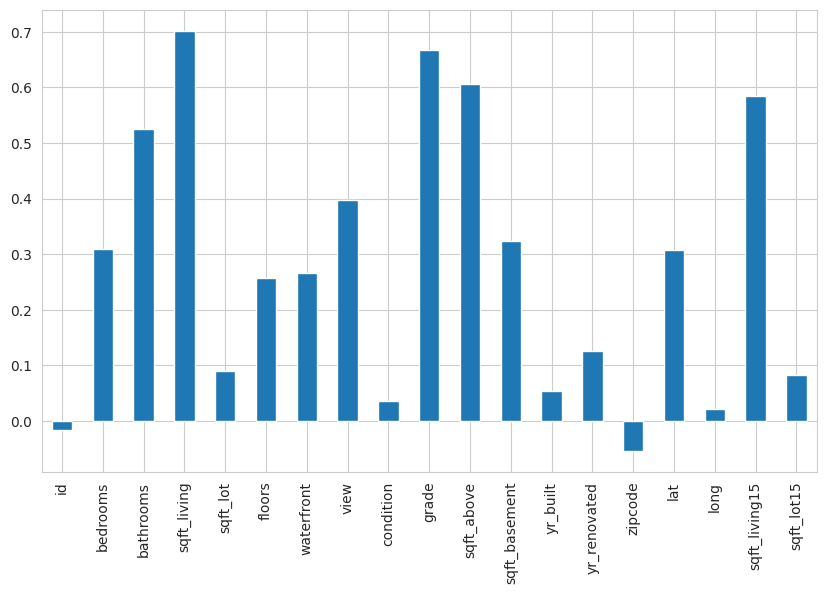

In [ ]:
corr_w=df.corrwith(df['price'])
plt.figure(figsize=(10,6))
corr_w.drop('price').plot(kind='bar')

Plotting this figure to know the correlation between Sq ft. living area to price as the above graph shows the price is most related to price.

<Axes: xlabel='sqft_living', ylabel='price'>

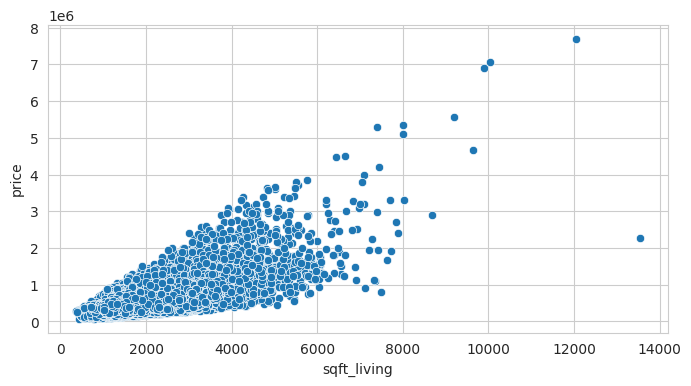

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='sqft_living',y='price',data=df)

Using the displot we can check the price distribution of the houses in the datset.

<Axes: xlabel='price', ylabel='Density'>

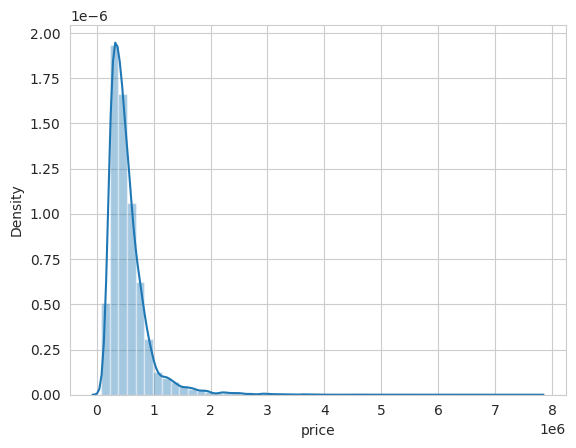

In [ ]:
sns.distplot(df.price,kde=True)

Using countplot to get the data about how many homes are there with diffrent amount of rooms.

<Axes: xlabel='bedrooms', ylabel='count'>

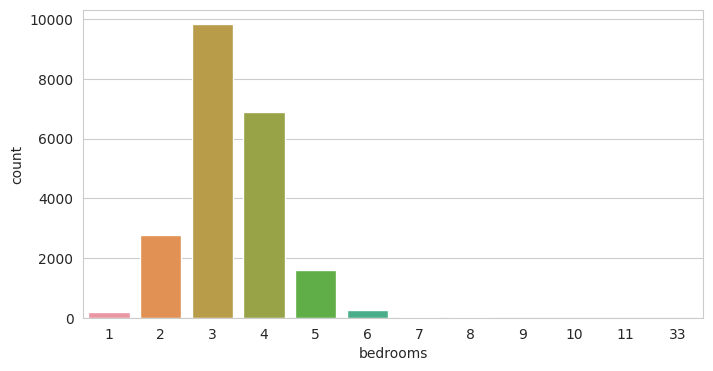

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='bedrooms',data=df)

Using barplot to know whats the mean sq ft living in each category of bedroom no.

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

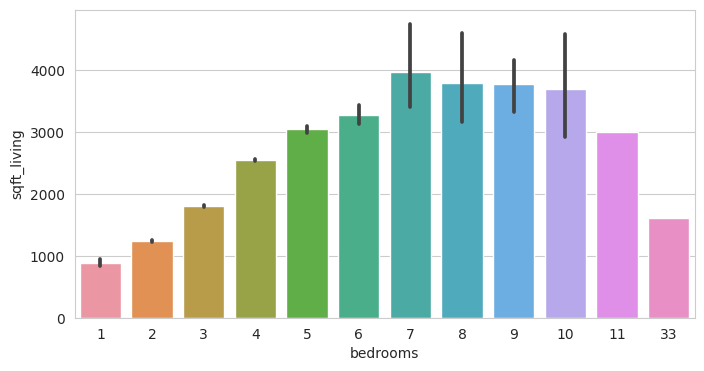

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='bedrooms',y='sqft_living',data=df)

Using the barplot to check mean price of houses based upon how many floors they have.

<Axes: xlabel='floors', ylabel='price'>

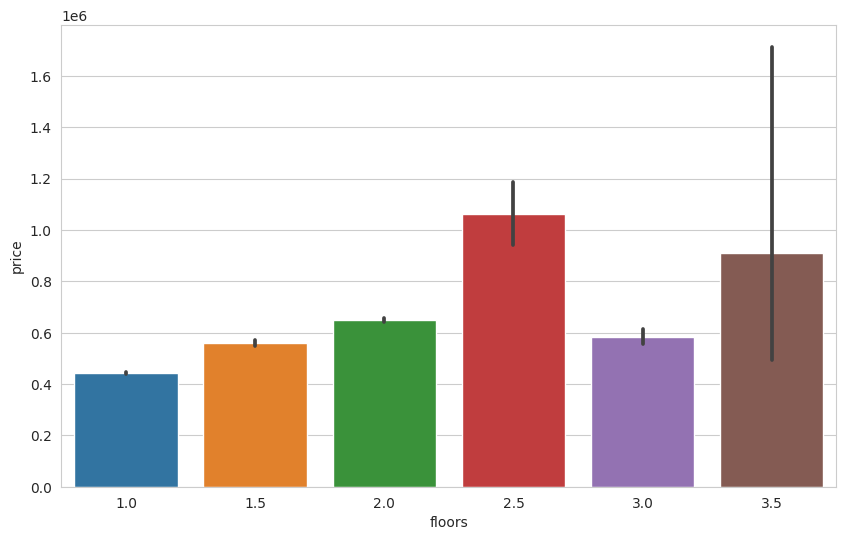

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='floors',y='price',data=df)

Checking is their any bedrooms more than 12 to make our data more precise and less mistaken.

In [ ]:
df[df['bedrooms']>12]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


We have seen a house with more than 12 and we are going to remove that house from our dataset.

In [ ]:
df = df.drop(df[df['bedrooms'] > 30].index)

Using scatterplot to plot a graph between bedrooms and price.

<Axes: xlabel='bedrooms', ylabel='price'>

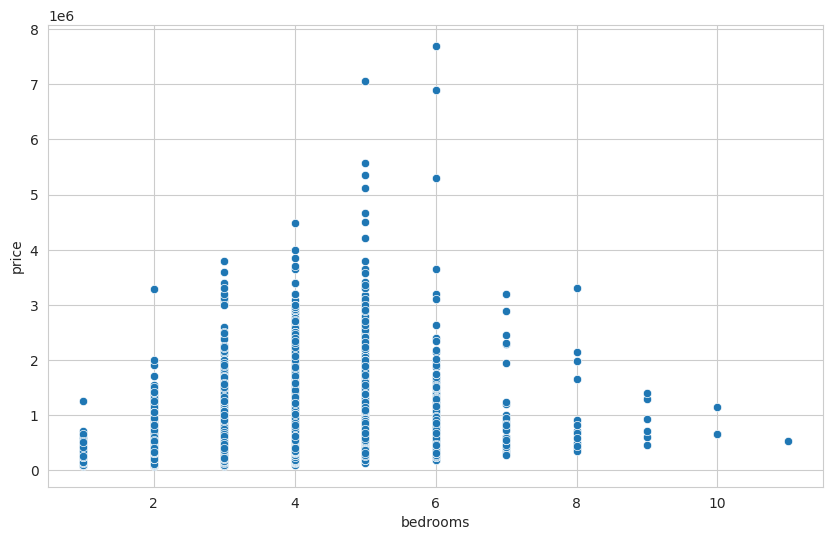

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bedrooms',y='price',data=df)

Using scatterlpot to plot the data, houses as location in the graph and their postioning and we have set hue to diffrentiate the pricing.

<Axes: xlabel='lat', ylabel='long'>

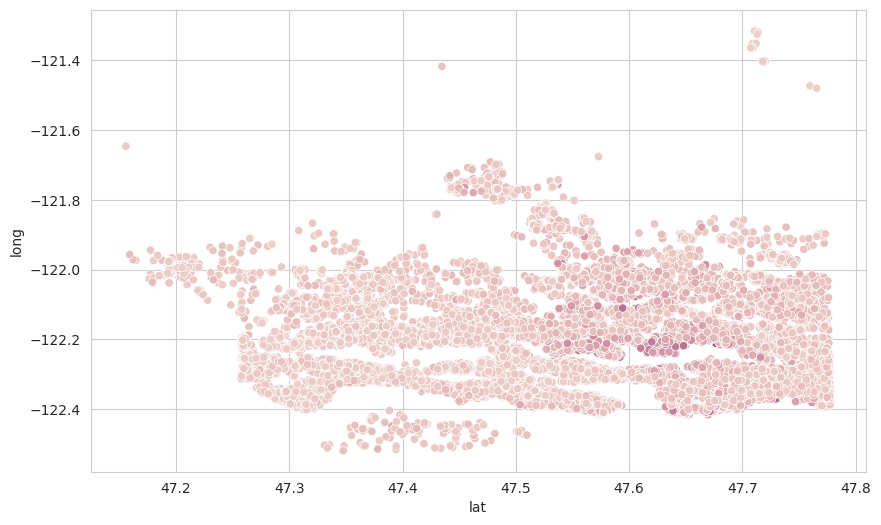

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='lat',y='long',data=df,hue='price',legend=False)

We are using countplot to compare the quantity of houses with diffrent grades alloted.

<Axes: xlabel='grade', ylabel='count'>

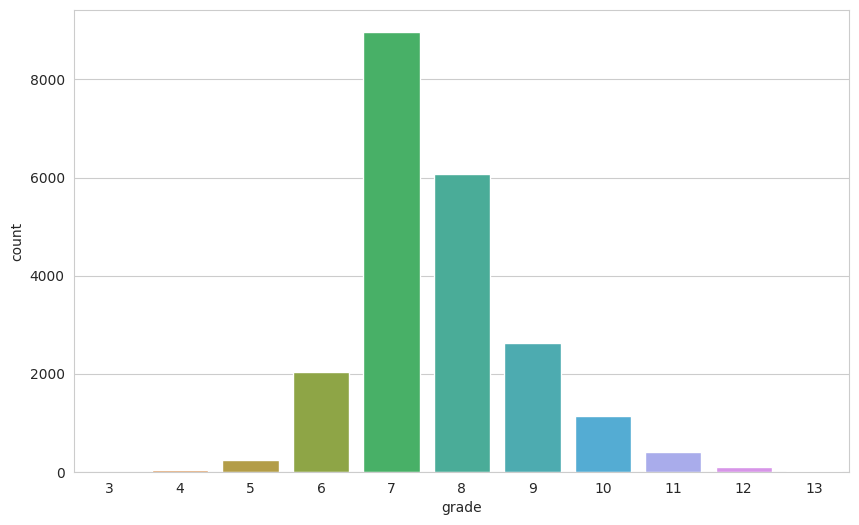

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade',data=df)

Using scatterplot graph to plot the relation between year the house is built and the price with grade as hue.

<Axes: xlabel='yr_built', ylabel='price'>

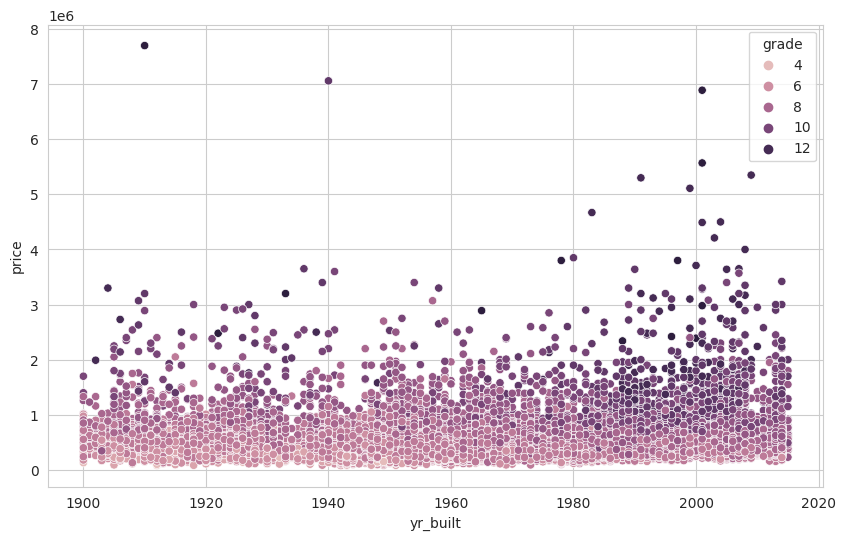

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='yr_built',y='price',data=df,hue='grade')

Wacthing out for the values and the data types for training our model and eliminating the values which are not usefull

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     21596 non-null  int64  
 9   view           21596 non-null  int64  
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  int64  
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  int64  
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   21596 non-null  int64  
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

Using value counts for finding the year which which that house was built

In [ ]:
df['yr_built'].value_counts().sort_values(ascending=False)

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Changing the date format to find out the year which it was listed.

In [ ]:
df['date']=pd.to_datetime(df['date'])

Extracting the year from the date which the the property was listed on.

Assigning values to x and y varriables to create train test split

In [ ]:
x=df.drop(['date','id','price'],axis=1)
y=df['price']

Importing train test split from sklearn module

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the dataset in Train & Test so that we can test the model with the test data

In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_tr.shape

(16197, 18)

We need to normalize the data in order to fit the model with the help of standard scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

Transforming the training set to normalize and make accurate predictions.

In [ ]:
scaler=StandardScaler()
x_tr=scaler.fit_transform(x_tr)
x_te=scaler.transform(x_te)

Importing more nessecary libraries

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Creating a function to find the best algorithm to work upon the prediction process

In [ ]:
def classify(classification,x_train,y_train,x_test,y_test):
    clf=classification.fit(x_train,y_train)
    pred=clf.predict(x_test)
    print('='*35)
    print(i)
    print('-'*35)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    print('R2 Score',r2)
    print('Mean Squared Error',mse)
    print('RSME',math.sqrt(mse))
    print('-'*35)
    print('='*35)


Impoting more libraries and creating a list of algorithms to put in our fucntion.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# Creating a list to store the models
regression_models = [AdaBoostRegressor(),
                     GradientBoostingRegressor(),
                     XGBRegressor(),
                     LGBMRegressor(),
                     LinearRegression(),
                     RandomForestRegressor(),
                     KNeighborsRegressor(),
                     SVR()]

# Print the list of boosting models
print(regression_models)

[AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...), LGBMRegressor(), LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), SVR()]


Checking the algorithms in the classify function to know the accuracy of the result

In [ ]:
for i in regression_models:
  classify(i,x_tr,y_tr,x_te,y_te)

AdaBoostRegressor()
-----------------------------------
R2 Score 0.17042648119044457
Mean Squared Error 114540729638.52968
RSME 338438.6645147532
-----------------------------------
GradientBoostingRegressor()
-----------------------------------
R2 Score 0.8666755713987682
Mean Squared Error 18408347161.97217
RSME 135677.36422105262
-----------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
         

As XGBRegressor is showing a good R2 Score so we will be moving forward for the final model.

In [ ]:
reg=XGBRegressor()

Will be using GridSearchCV to give in parameter settings to get more accuraccy out of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

We are giving in the parameters and using GridSearchCV to tune the model.

In [ ]:
learning_rate = [0.1,0.01]
n_estimators = [ 500, 1000]
max_depth=[3,5]
subsample=  [0.9]

hyperparameter_grid = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'subsample': subsample,
    'colsample_bytree': [0.5],
}

grid_cv = GridSearchCV(
    estimator=reg,
    param_grid=hyperparameter_grid,
    verbose=3,
    return_train_score=True
)

And now we will be training the model.

In [ ]:
grid_cv.fit(x_tr,y_tr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9;, score=(train=0.944, test=0.860) total time=   3.6s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9;, score=(train=0.945, test=0.895) total time=   2.9s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9;, score=(train=0.945, test=0.903) total time=   3.0s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9;, score=(train=0.945, test=0.893) total time=   5.7s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.9;, score=(train=0.948, test=0.879) total time=   2.9s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.9;, score=(train=0.960, test=0.862) total time=   6.1s
[CV 2/5] END colsample_bytr

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.5],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [500, 1000], 'subsample': [0.9]},
             return_train_score=True, verbose=3)

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, reg_alpha=1, reg_lambda=1, subsample=0.9;, score=(train=0.989, test=0.912) total time=  12.2s


Using Best_estimators_ to find the best parameter settings for tuning the model.

In [ ]:
best_params = grid_cv.best_estimator_

In [ ]:
best_params

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Putting the parameters we found from best_estimators_ to work in the XGBregressor model.

In [ ]:
reg_n = XGBRegressor(learning_rate=best_params.learning_rate,
                     n_estimators=best_params.n_estimators,
                     colsample_bytree=best_params.colsample_bytree,
                     max_depth=best_params.max_depth,
                     subsample=best_params.subsample)

Fitting the model from new regression model.

In [ ]:
reg_n.fit(x_tr,y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predicting based upon the new model.

In [ ]:
pred=reg_n.predict(x_te)

Checking the scores of the predicted results from the new model we devloped.

In [ ]:
print('R2 Score :',r2_score(y_te,pred))
print('\n')
print('MSE :',mean_squared_error(y_te,pred))
print('\n')
print('RSME :',math.sqrt(mean_squared_error(y_te,pred)))

R2 Score : 0.8997907535831301


MSE : 13836073525.570791


RSME : 117626.84015806422
